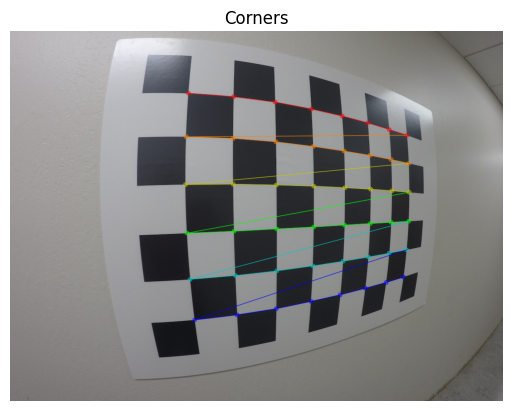

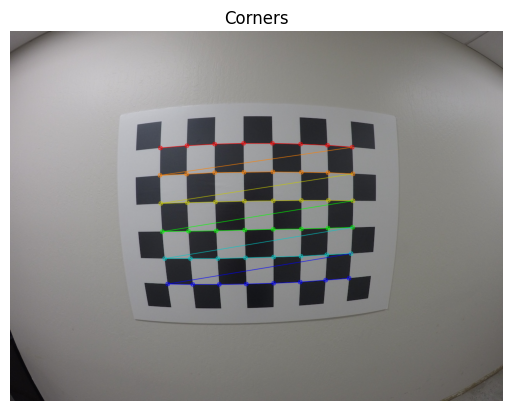

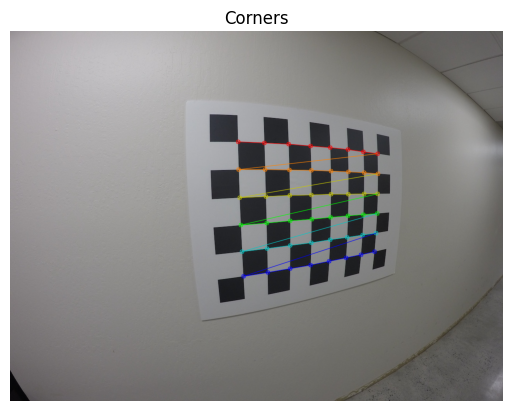

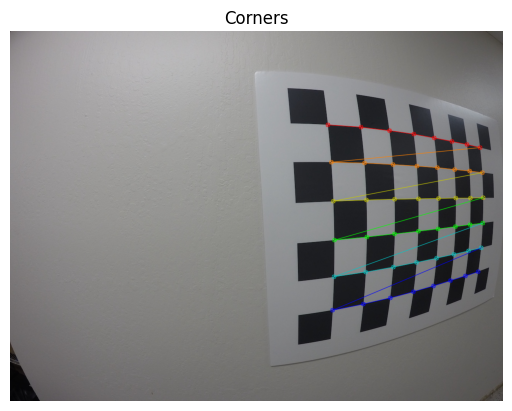

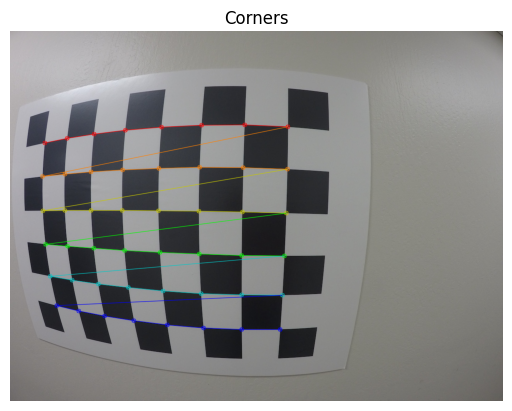

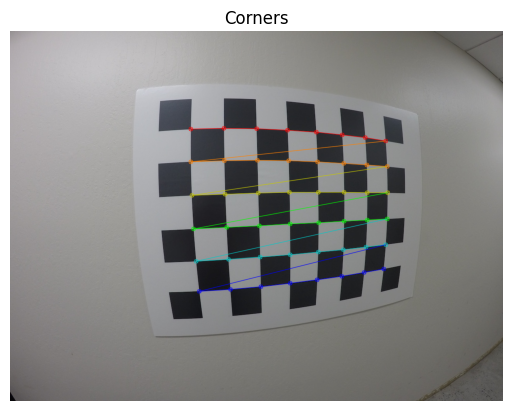

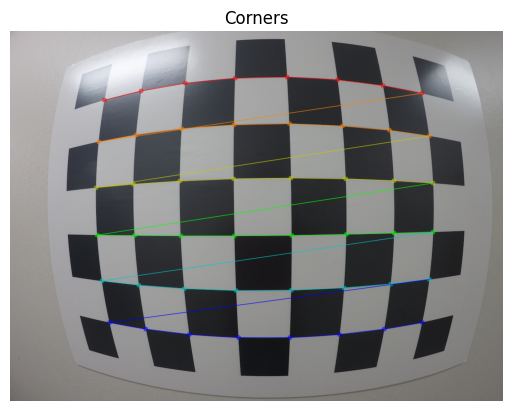

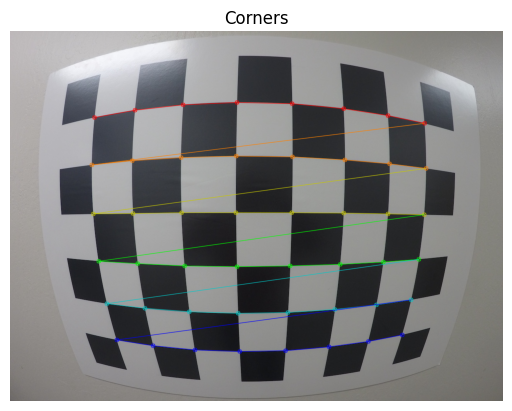

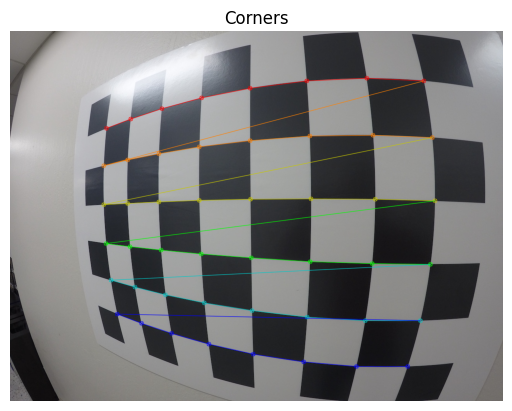

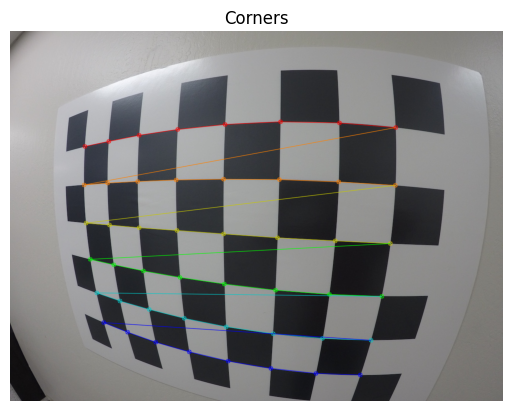

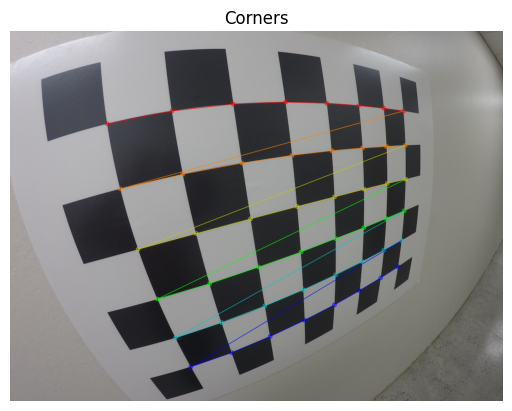

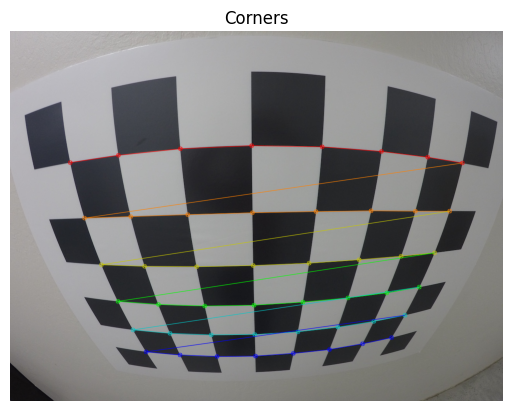

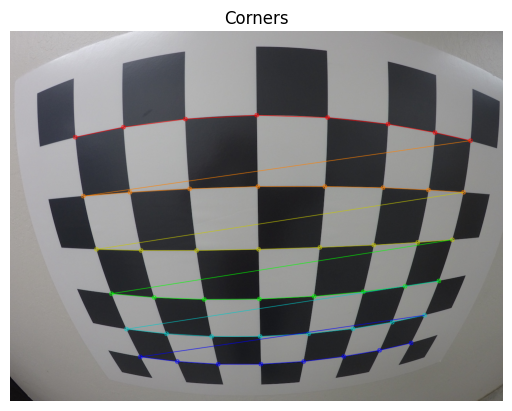

Camera matrix (K):
 [[560.63060618   0.         651.03864649]
 [  0.         561.85798515 498.64303263]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[-2.41824099e-01  7.21079523e-02  5.10334897e-05  1.73689982e-04
  -1.06238554e-02]]


In [5]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# 1. Define chessboard size (inside corners per row & column)
chessboard_size = (8, 6)  # for 9x7 squares

# 2. Prepare 3D points for the chessboard (z = 0 because it's flat)
objp = np.zeros((chessboard_size[0]*chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

# Arrays to store points
objpoints = []  # 3D points
imgpoints = []  # 2D points

# 3. Load calibration images
images = glob.glob(r'D:\kathan\python_codes\7th sem\CV lab\Comuter-Vision-Lab\imagedata\*.jpg')


if not images:
    raise ValueError("No images found. Check the path!")

# Save image size from first image
test_img = cv2.imread(images[0])
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
img_size = gray.shape[::-1]

# 4. Process all images
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw corners for visualization
        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Corners")
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠️ Chessboard not detected in {fname}")

# 5. Run calibration
if objpoints and imgpoints:
    ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    print("Camera matrix (K):\n", K)
    print("Distortion coefficients:\n", dist)
else:
    print("❌ No corners were detected in any image. Check chessboard_size or image quality")
